In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, RadioButtons, VBox, HBox, Output
from IPython.display import display


signal_data_by_mass = {}
for file in os.listdir():
    if file.startswith("DM_") and file.endswith(".csv"):
        mass_str = file.split("_")[1].replace(".csv", "")
        try:
            mass = int(mass_str)
            signal_data_by_mass[mass] = pd.read_csv(file)
        except ValueError:
            continue


background_data = {}
background_labels = ["WZ", "ZZ", "Z+jets", "Non-resonant_ll"]
for label in background_labels:
    for file in os.listdir():
        if file.startswith(label) and file.endswith(".csv"):
            background_data[label] = pd.read_csv(file)


def interactive_histogram(variable):
    output = Output()
    
    etmiss_min_slider = FloatSlider(value=0, min=0, max=1700, step=50, description="Min ETmiss")
    etmiss_max_slider = FloatSlider(value=1750, min=50, max=1750, step=50, description="Max ETmiss")
    bjet_radio = RadioButtons(options=['0', '1', '2'], description="Bjets", layout={"width": "150px"})

    def update(*args):
        with output:
            output.clear_output()
            plt.figure(figsize=(10, 6))
            
            
            for label in background_labels:
                df = background_data.get(label)
                if df is not None:
                    df_cut = df[
                        (df['ETmiss'] >= etmiss_min_slider.value) &
                        (df['ETmiss'] <= etmiss_max_slider.value) &
                        (df['N_bjets'] == int(bjet_radio.value))
                    ]
                    weights = df_cut['totalWeight']
                    plt.hist(df_cut[variable], bins=40, weights=weights,
                             label=f"Background: {label}", alpha=0.4)

            
            for mass in sorted(signal_data_by_mass.keys(), reverse=True):
                df = signal_data_by_mass[mass]
                df_cut = df[
                    (df['ETmiss'] >= etmiss_min_slider.value) &
                    (df['ETmiss'] <= etmiss_max_slider.value) &
                    (df['N_bjets'] == int(bjet_radio.value))
                ]
                weights = df_cut['totalWeight']
                plt.hist(df_cut[variable], bins=40, weights=weights,
                         label=f"Signal {mass} GeV", histtype="step", linewidth=2)

            plt.xlabel(variable)
            plt.ylabel("Weighted Events")
            plt.title(f"{variable} with ETmiss ∈ [{etmiss_min_slider.value}, {etmiss_max_slider.value}] and {bjet_radio.value} b-jets")
            plt.legend(loc="upper right")
            plt.grid(True)
            plt.show()

    
    etmiss_min_slider.observe(update, names="value")
    etmiss_max_slider.observe(update, names="value")
    bjet_radio.observe(update, names="value")
    
    
    ui = HBox([VBox([etmiss_min_slider, etmiss_max_slider]), bjet_radio])
    display(ui, output)

    
    update()


In [2]:
interactive_histogram("ETmiss")
interactive_histogram("mll")
interactive_histogram("lead_lep_pt")
interactive_histogram("dRll")


Output()

Output()

Output()

Output()

KeyError: 'nBJets'

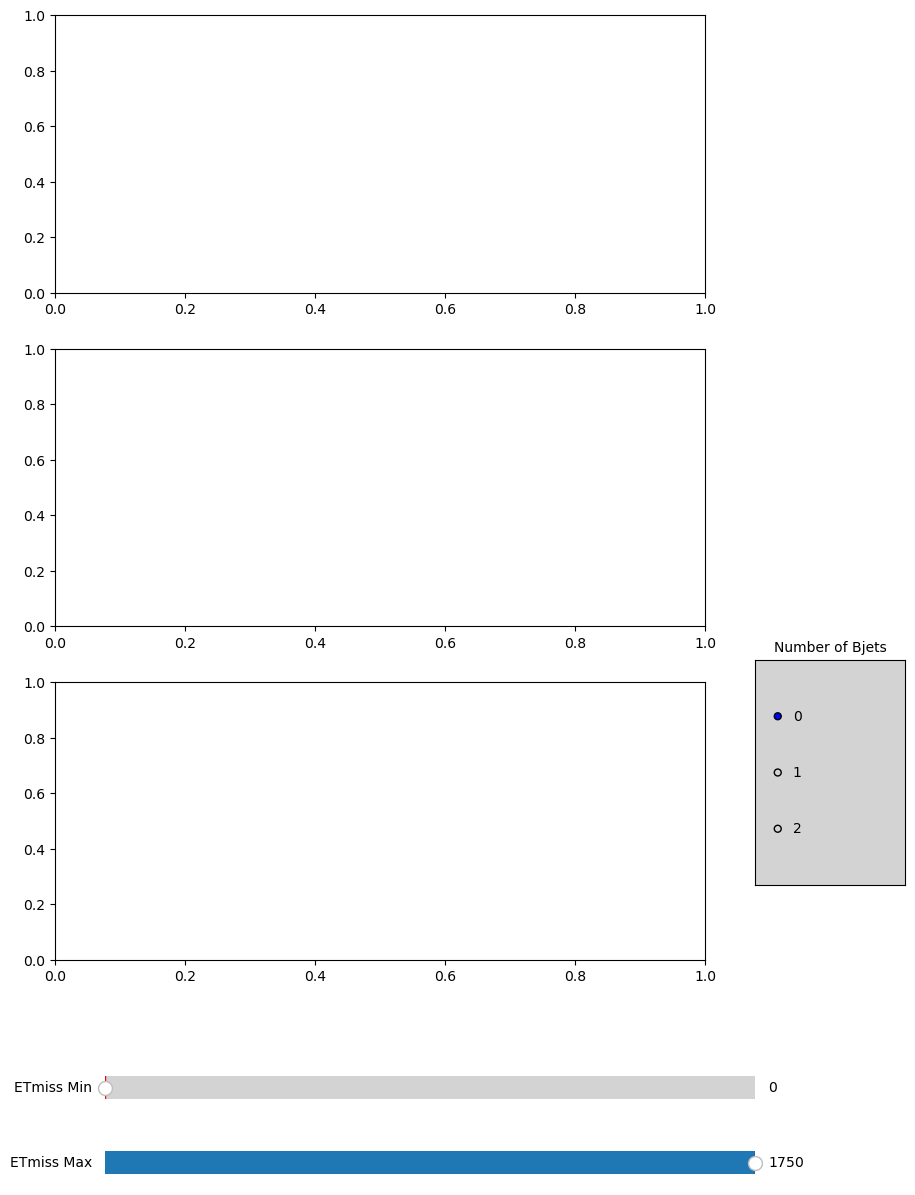

In [3]:
interactive_multi_histograms(["ETmiss", "m_ll", "pT_ll"])